# Caso Fundamentos de Machine Learning

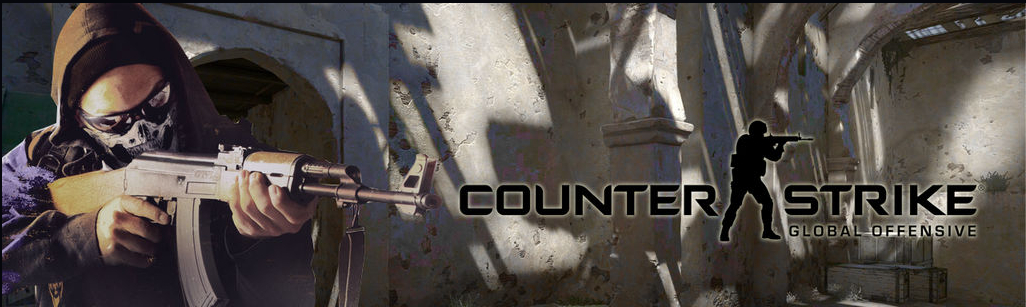

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.

$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

In [2]:
#Importación de liberarias a usar

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Carga del dataset
df_cs = pd.read_csv('csgo.csv', sep = ';')
df_cs.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120249,...,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,False,True,False,False,43.486626,...,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,False,True,False,False,37.354698,...,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,False,True,False,False,47.678861,...,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,False,True,True,False,53.122511,...,0,0,0,0,1000,4400,0,0,0,0


### Limpieza de datos y transformación 

In [4]:
df_2 = df_cs.drop(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId'], axis = 1)

In [5]:
df_2['RoundWinner'] = df_2['RoundWinner'].astype(int)
df_2['MatchWinner'] = df_2['MatchWinner'].astype(int)
df_2['Survived'] = df_2['Survived'].astype(int)
df_2['AbnormalMatch'] = df_2['AbnormalMatch'].astype(int)

In [6]:
df_2.head()

,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,0,1,0,0,51.120249,100831.407375,0,4,0.0,0.0,...,0,0,0,0,750,4400,0,0,0,0
1,0,1,0,0,43.486626,60960.883185,0,0,0.0,0.0,...,0,0,0,0,800,4400,0,0,0,0
2,0,1,0,0,37.354698,56422.523836,0,0,0.0,0.0,...,0,0,0,0,1000,4400,0,0,0,0
3,0,1,0,0,47.678861,89634.733132,0,0,0.0,0.0,...,0,0,0,0,850,4400,0,0,0,0
4,0,1,1,0,53.122511,108656.497344,1,1,0.0,0.0,...,0,0,0,0,1000,4400,0,0,0,0


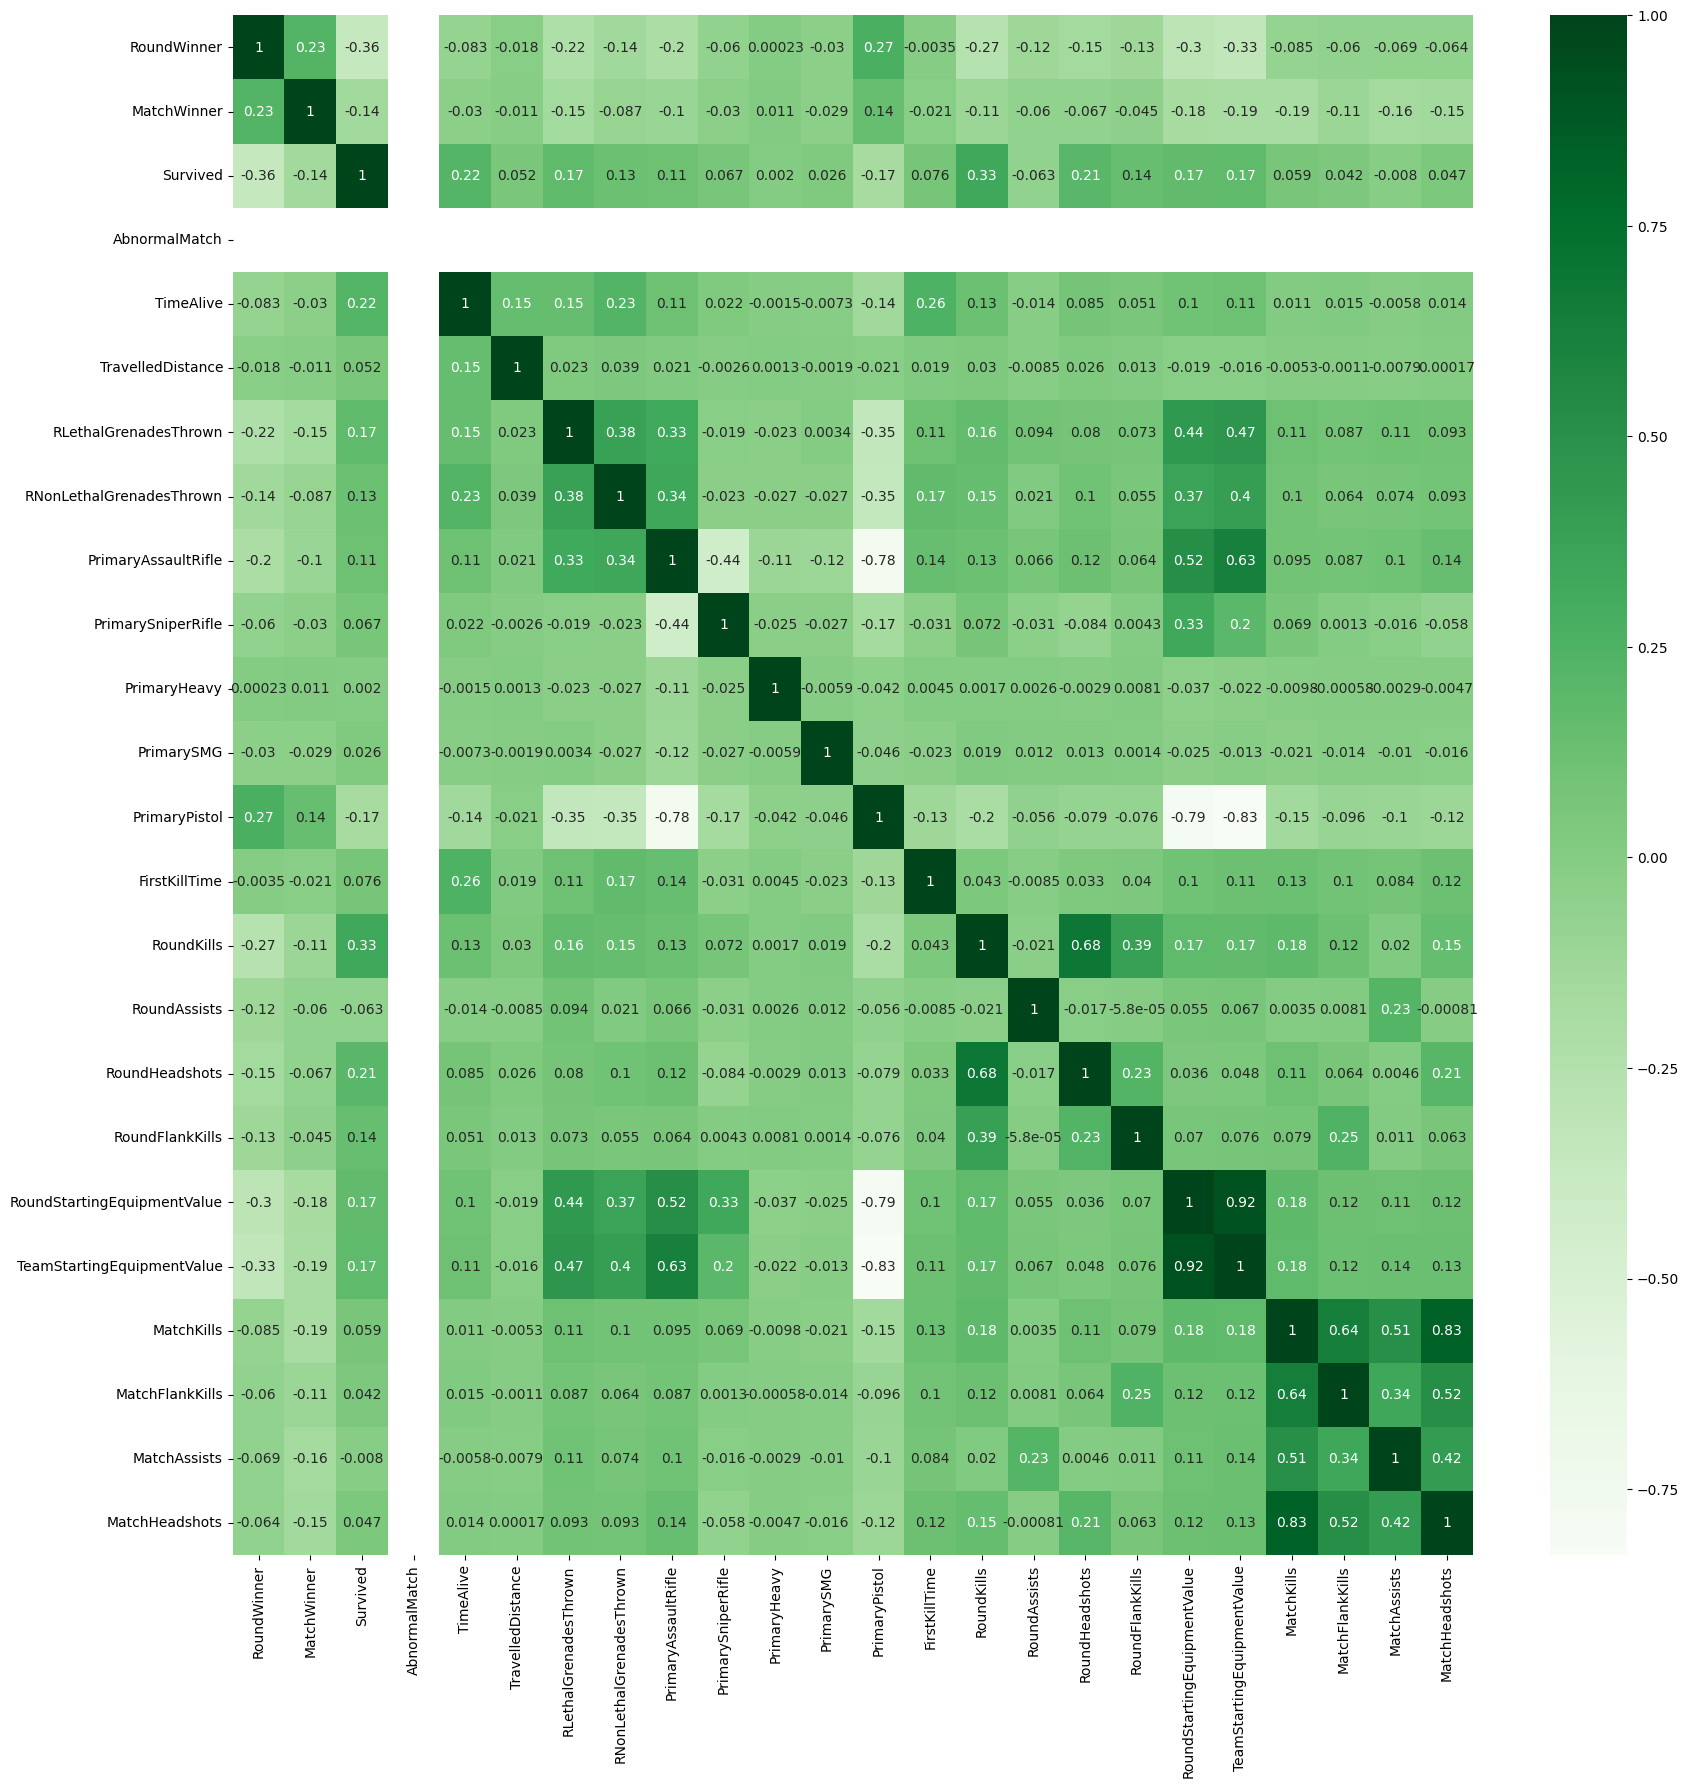

In [7]:
plt.figure(figsize=(20,20))

corr_mat = df_2.corr()
sns.heatmap(corr_mat, cmap='Greens', annot=True)

plt.show()

### Análisis realción MatchKills vs MatchHeadshots

In [8]:
features = ['MatchKills', 'MatchHeadshots']

df_lr = pd.DataFrame()

for feature in features:
    df_lr[feature] = df_2[feature]

In [9]:
df_lr.shape

(79157, 2)

<Axes: xlabel='MatchKills', ylabel='MatchHeadshots'>

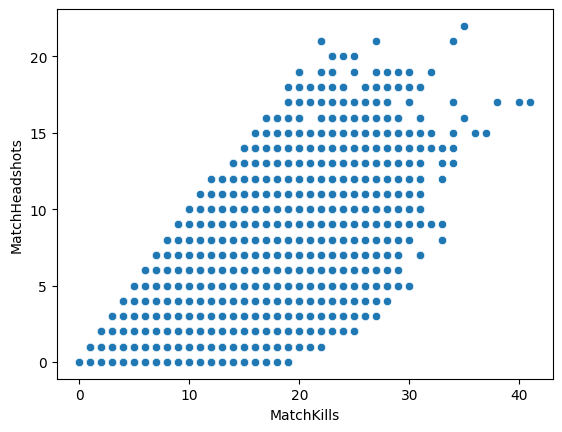

In [10]:
# Grafica de la realcion

sns.scatterplot(x = 'MatchKills', y = 'MatchHeadshots', data = df_lr)


In [11]:
# Funcion para segregar puntos

def segregacion(data,colors,limit,feature):
    assign_ter = []
    for item, row in data.iterrows():
        if row[feature] > limit:
            assign_ter.append(colores[0])
        else:
            assign_ter.append(colores[1])
    return assign_ter

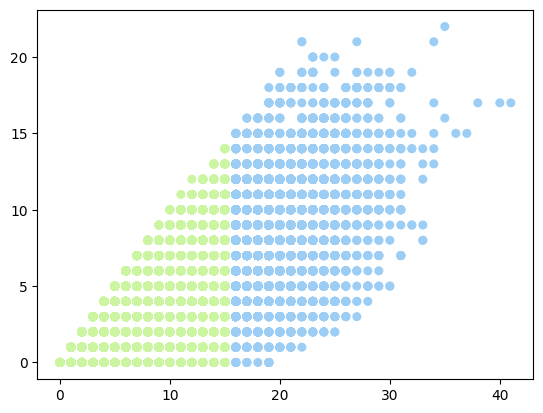

In [12]:
# Mejorando la visualizacion

f1 = df_lr['MatchKills'].values
f2 = df_lr['MatchHeadshots'].values
tamanios = [30,60]

limit = 15

colores = ['#9BCDF5','#CBF5A1']

feature = 'MatchKills'

assign_ter = segregacion(df_lr,colores,limit, feature)

plt.scatter(f1,f2,c = assign_ter,s = tamanios[0])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_lr[['MatchKills']]
Y = df_lr['MatchHeadshots']

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(Y_test,Y_pred)}, MAE: {mean_absolute_error(Y_test, Y_pred)}, r2: {r2_score(Y_test, Y_pred)}')

MSE: 3.272109461163721, MAE: 1.3104561417491931, r2: 0.6894554271406144


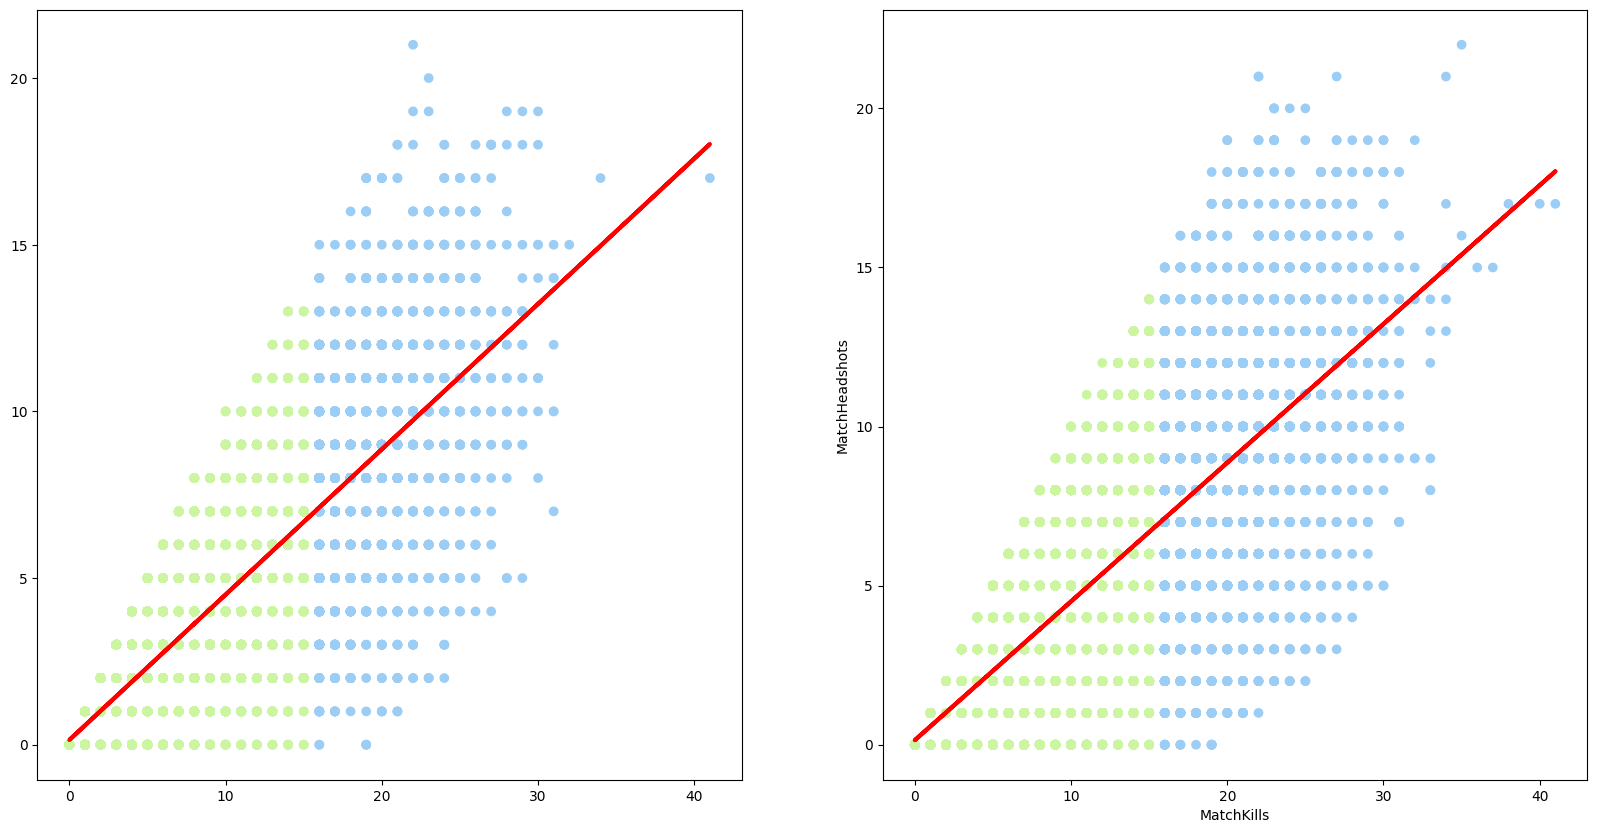

In [15]:
df_test = pd.DataFrame()
df_test['MatchKills'] = X_test[['MatchKills']]
df_test['MatchHeadshots'] = Y_test

assign_ter1 = segregacion(df_test, colores,15,'MatchKills')
assign_ter2 = segregacion(df_lr,colores,limit, feature)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(X_test[['MatchKills']], Y_test, c=assign_ter1)
plt.plot(X_test[['MatchKills']], Y_pred, color = 'red', linewidth = 3)

plt.subplot(1,2,2)
plt.scatter(f1,f2,c = assign_ter2)
plt.plot(X_test[['MatchKills']], Y_pred, color = 'red', linewidth = 3)

plt.xlabel('MatchKills')
plt.ylabel('MatchHeadshots')

plt.show()

### Modelo de etiquetas matchwinner en relacion a las variables MatchKills y MatcgHeadshots

<Axes: xlabel='MatchKills', ylabel='MatchHeadshots'>

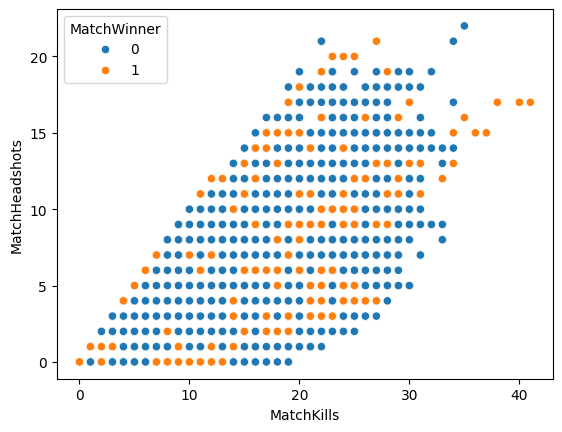

In [16]:
sns.scatterplot(x = 'MatchKills', y = 'MatchHeadshots', hue = 'MatchWinner', data = df_2)

In [17]:
features = ['MatchKills', 'MatchHeadshots', 'MatchWinner']

df_logrg = pd.DataFrame()

for feature in features:
    df_logrg[feature] = df_2[feature]



array([[<Axes: title={'center': 'MatchKills'}>,
        <Axes: title={'center': 'MatchHeadshots'}>]], dtype=object)

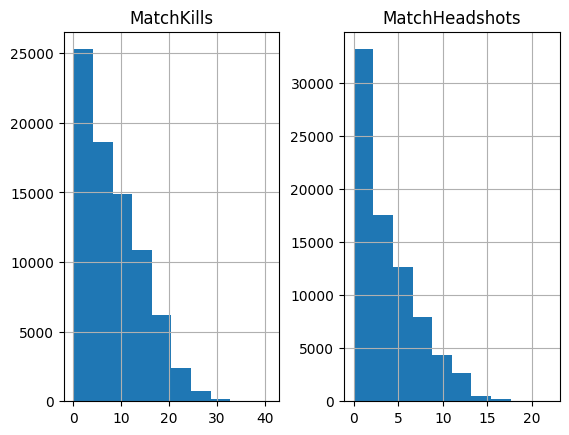

In [18]:
df_logrg.drop(['MatchWinner'], axis = 1).hist()

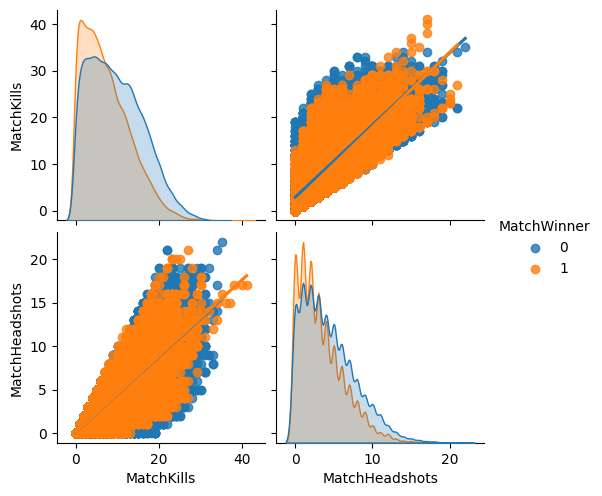

In [19]:
sns.pairplot(df_logrg.dropna(), hue = 'MatchWinner', vars=['MatchKills', 'MatchHeadshots'], kind = 'reg')

In [20]:
from sklearn.linear_model import LogisticRegression

X=np.array(df_logrg.drop(['MatchWinner'], axis = 1))
y = np.array(df_logrg['MatchWinner'])

model = LogisticRegression()

model.fit(X,y)

LogisticRegression()

In [21]:
model.score(X,y)

0.5749965258915826

### Validación del Modelo

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [23]:
kfold = KFold(n_splits=10)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'{cv_results.mean()}, {cv_results.std()}')

0.5759018777694753, 0.005505420262786026


In [24]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
print(f'Prediction score: {accuracy_score(y_test, pred)}')

Prediction score: 0.5693532086912582


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60      8359
           1       0.55      0.51      0.53      7473

    accuracy                           0.57     15832
   macro avg       0.57      0.57      0.57     15832
weighted avg       0.57      0.57      0.57     15832



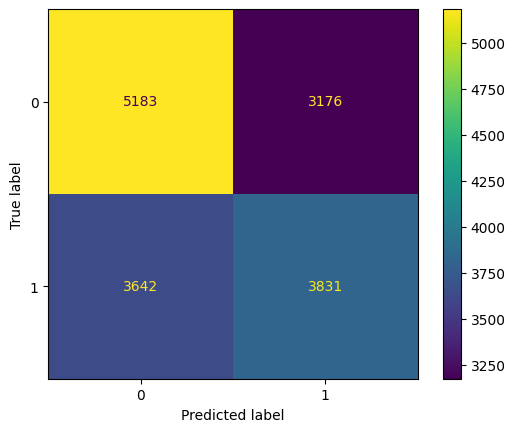

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Árbol de decisión como regresión

<Axes: xlabel='MatchKills', ylabel='MatchHeadshots'>

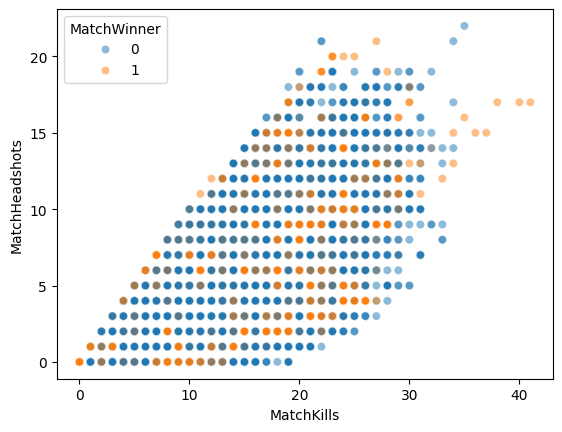

In [27]:
# Visualizacion de la data

sns.scatterplot(
    data = df_2,
    x = 'MatchKills',
    y = 'MatchHeadshots',
    hue = 'MatchWinner',
    alpha = 0.5
)

In [28]:
#Funcion que calcula la entropia del modelo

def entropy(data):
    classes = np.unique(data)
    entropies = []
    for c in classes:
        p = sum(data == c)/len(data)
        current_entrpy = p * np.log2(p)
        entropies.append(current_entrpy)
    return -1 * sum(entropies)

In [31]:
X = df_2[['MatchKills']]
Y = df_2['MatchHeadshots']

In [35]:
from sklearn.tree import DecisionTreeRegressor

mod = DecisionTreeRegressor()
mod.fit(X,Y)

Yhat = mod.predict(X)

In [36]:
mse = mean_squared_error(Y,Yhat)
mae = mean_absolute_error(Y,Yhat)
r2 = r2_score(Y,Yhat)

print(f'MSE: {mse} MAE: {mae} r2: {r2}')

MSE: 3.2413096263312084 MAE: 1.294217174566582 r2: 0.6925122061475673


In [40]:
from sklearn import tree

plt.subplots(1,1, figsize = (100,100))
_ = tree.plot_tree(mod)

### Evitando el overfitting

In [48]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.2)

In [50]:
mod2 = DecisionTreeRegressor()
mod2.fit(Xtrain, Ytrain)

Yhat = mod2.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
r2 = r2_score(Ytest, Yhat)

print(f'MSE: {mse} MAE: {mae} r2 {r2}')

MSE: 3.147670469514358 MAE: 1.2817949878588892 r2 0.6922566145785776


### Sincronización del modelo

In [53]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.2)

In [54]:
from sklearn.model_selection import GridSearchCV

mod3 = DecisionTreeRegressor()
params = {
    'max_depth':np.arange(3,6),
    'min_samples_split': np.arange(2,5)
    }
grid = GridSearchCV(estimator= mod3, param_grid=params, cv = 10)

grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])})

In [56]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.690818449803939
{'max_depth': 5, 'min_samples_split': 2}
DecisionTreeRegressor(max_depth=5)


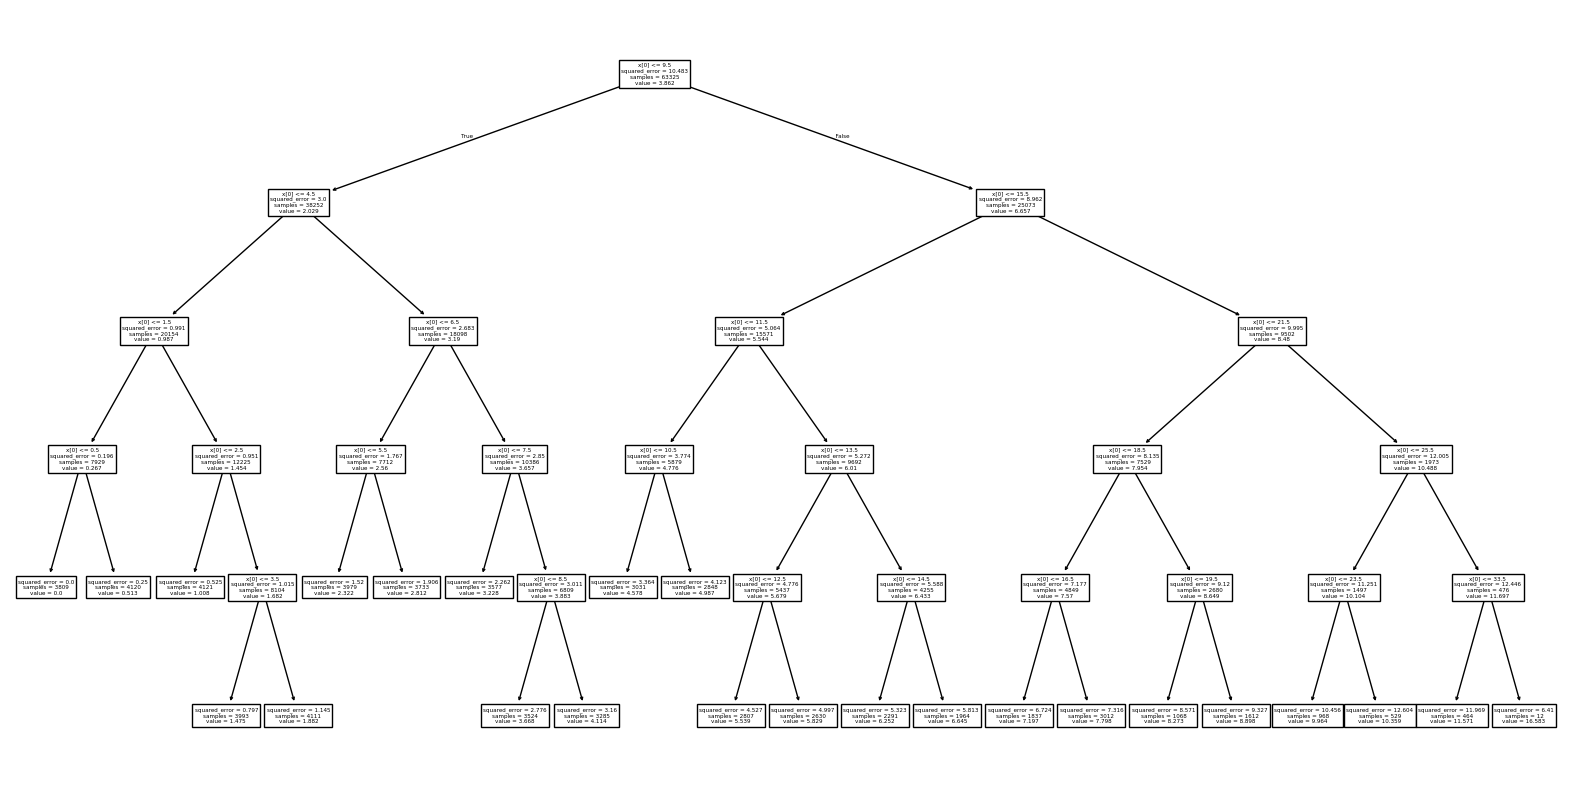

In [59]:
plt.subplots(1,1, figsize = (20,10))

_ = tree.plot_tree(grid.best_estimator_)

### Visualización del modelo

In [61]:
Yhat = grid.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
r2 = r2_score(Ytest, Yhat)

print(f'MSE {mse} MAE: {mae} r2: {r2}')

MSE 3.2802452653698553 MAE: 1.2985449633146093 r2: 0.6955140992249582
